<a href="https://colab.research.google.com/github/joshuakalungi/Data_Science/blob/main/BostonHousePrice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***BOSTON HOUSE PRICE PREDICTION ASSIGNMENT***

**Some functionalities have been implemented however, whenever you see a TODO task, make sure you implement it for the cell to run or else you will receive errors even in the preeding cells**

Regression is basically a process which predicts the relationship between x and y based on features.
This time we are going to practice Linear Regression with Boston House Price Data that are already embedded in scikit-learn datasets

**Useful functions**
- sklearn.metrics.mean_squared_error: famous evaluation method (MSE)

- np.sqrt(x): square root of tensor x

- linear_model.coef_ : get `Regression coefficient` of the fitted linear model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

# Required to do
<br>--> Completed successfully

In [2]:
BOSTON_DATA = datasets.load_boston()
BOSTON_DATA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

## Simple EDA

# Loading both the data and target and convert it into a dataFrame
<br> --> Transform the data set into a data frame
<br> --> data = the data we want or the independent variables also known as the x values
<br> --> target = the target variable or the price of the houses or dependent variable also known as the y value


In [3]:
features = pd.DataFrame(BOSTON_DATA.data, columns= BOSTON_DATA.feature_names)
target_y = pd.DataFrame(BOSTON_DATA.target)

In [4]:
target_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


## Required to do
<br> --> Completed successfully

In [6]:
def add_target_to_data(dataset):
    df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
    print("Before adding target: ", df.shape)
    df['PRICE'] = dataset.target
    print("After adding target: {} \n {}\n".format(df.shape, df.head(2)))
    return df

In [8]:
dfy= add_target_to_data(BOSTON_DATA)

Before adding target:  (506, 13)
After adding target: (506, 14) 
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6  



In [9]:
dfy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
df = pd.concat([features, target_y], axis = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
BOSTON_DATA.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [19]:
BOSTON_DATA["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Final DataFrame Preparation


In [21]:
dataframe = pd.DataFrame(BOSTON_DATA.data, columns= BOSTON_DATA.feature_names)
dataframe["PRICE"] = BOSTON_DATA.target

In [22]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [23]:
dataframe.shape

(506, 14)

# Performing a data integrity check
<br> ___This is to check for any null values that might be in our dataFrame_ 

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# READ ABOUT MEMORY OPTIMIZATION
<br> ___This help to reduce the size of the file that you are working with_

# Data Overview

In [25]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
sns.set_theme(color_codes=True)

# Functions to draw linear regression models

<br> --> reglot()
<br> --> implot()

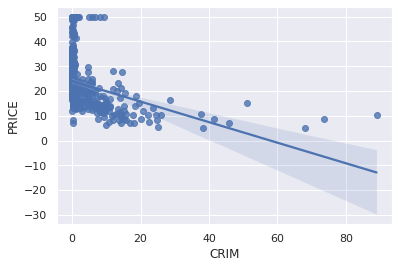

In [27]:
sns.regplot(x="CRIM", y="PRICE", data= dataframe);

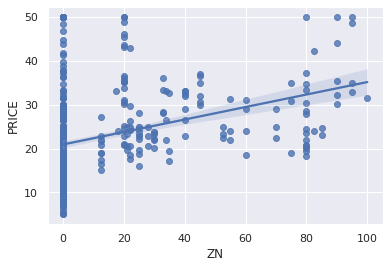

In [28]:
sns.regplot(x="ZN", y="PRICE", data= dataframe);

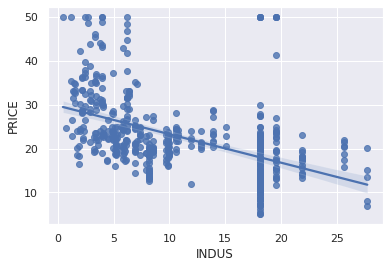

In [29]:
sns.regplot(x="INDUS", y="PRICE", data= dataframe)

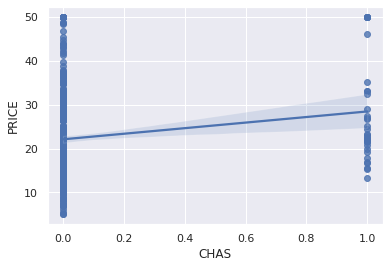

In [30]:
sns.regplot(x="CHAS", y="PRICE", data= dataframe)

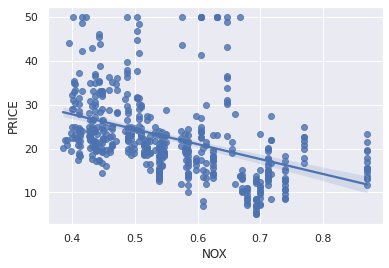

In [31]:
sns.regplot(x="NOX", y="PRICE", data = dataframe)

# 10 features as default.
<br> --> Why didn't I put all the 13 features? Because n_row=2 and n_col=5 as default.
<br> --> It will create 10 graphs for each features.

In [32]:
def plotting_graph(df, features, n_row=2, n_col=5):
    fig, axes = plt.subplots(n_row, n_col, figsize=(16, 8))

    assert len(features) == n_row * n_col

    # TODO: Draw a regression graph using seaborn's regplot
    for i, feature in enumerate(features):
        row = int(i / n_col)
        col = i % n_col
        sns.regplot(x=feature, y='PRICE', data=df, ax=axes[row][col])

    plt.show()

In [33]:
featurex= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX']
featurex

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']

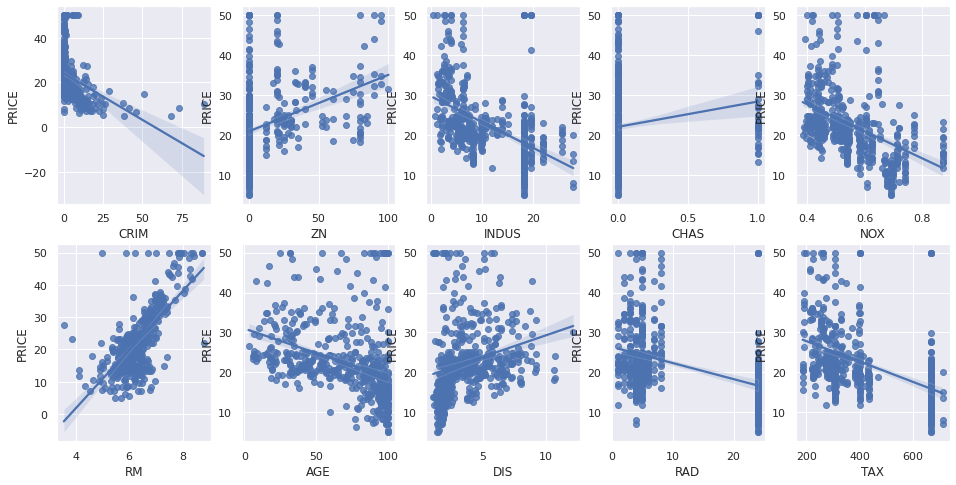

In [34]:
plotting_graph(dataframe, featurex, n_row=2, n_col= 5)

# Required to do
<br>--> Others without [PRICE]
<br>  # axis!! --> Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

In [35]:
def split_dataframe(df):
    label_data = df['PRICE']
    input_data = df.drop(['PRICE'], axis= 1)

    # TODO: split! Set random_state if you want consistently same result
    input_train, input_eval, label_train, label_eval = train_test_split(input_data, label_data, test_size=0.3,
                                                                        random_state=42)

    return input_train, input_eval, label_train, label_eval

In [36]:
boston_df = add_target_to_data(BOSTON_DATA)

Before adding target:  (506, 13)
After adding target: (506, 14) 
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6  



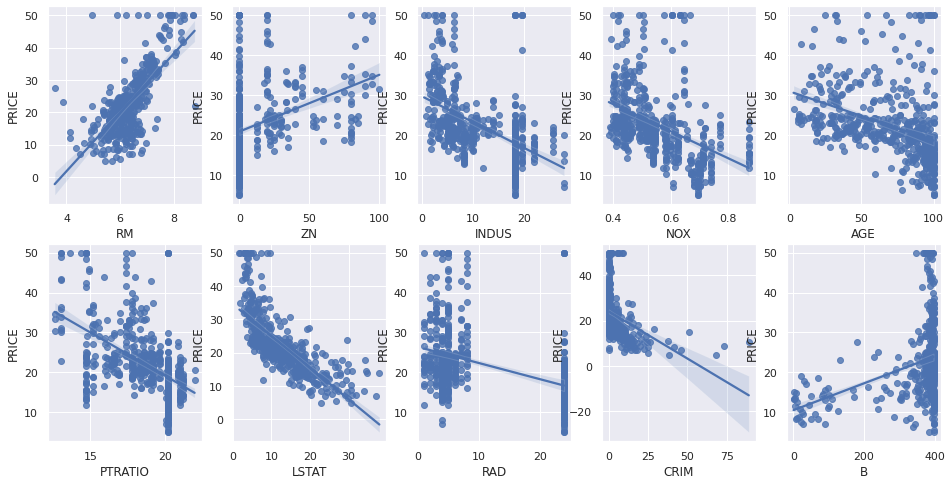

In [37]:
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD', 'CRIM', 'B']
plotting_graph(boston_df, features, n_row=2, n_col= 5)

## Correlation Coefficient
The correlation coefficient ranges from -1 to 1. 
If the value is close to 1, it means that there is a strong positive correlation between the two variables.
<br>___When it is close to -1, the variables have a strong negative correlation._

# Required to do

<br> __Successfully completed_

In [38]:
correlation_matrix = round(boston_df.corr(),2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


# Using a Heatmap

We can use a Heatmap to Visualize the Correlation Between Variables:


--> Import the library seaborn as sns
<br>--> Use sns.heatmap() to tell Python that we want a heatmap to visualize the correlation matrix.
<br>--> Use the correlation matrix. Define the maximal and minimal values of the heatmap. Define that 0 is the center.
<br>--> Define the colors with sns.diverging_palette. n=500 means that we want 500 types of color in the same color palette.
<br>--> square = True means that we want to see squares.




# Required to do

__Successfully completed_

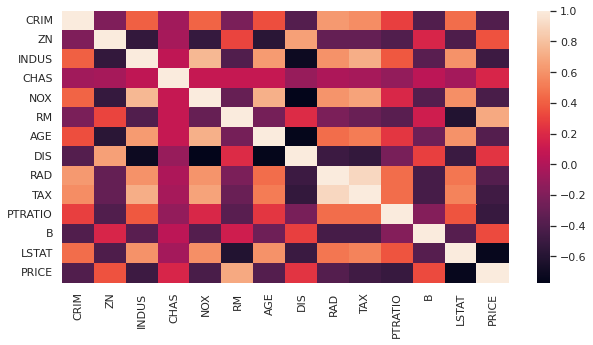

In [39]:
plt.figure(1, figsize=(10,5))
sns.heatmap(correlation_matrix)
plt.show()

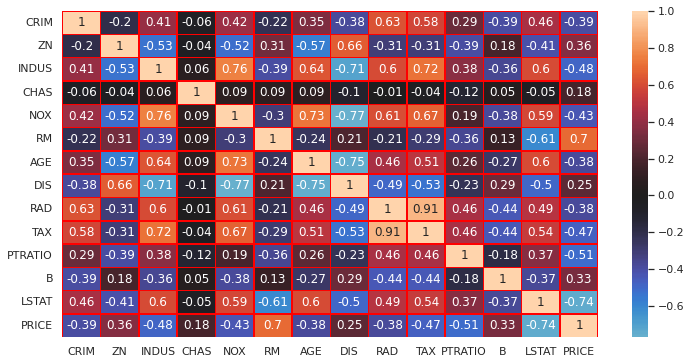

In [40]:
plt.figure(1, figsize=(12,6))
sns.heatmap(correlation_matrix,center=0, annot=True,linewidths=0.5, linecolor='red')
plt.show()

## Prediction with Linear Regression

Loading the machine learning model
<br>--> call the fit() method along with our training data.
<br> _____With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output, x and y, as the arguments_

In [41]:
X_train, X_test, Y_train, Y_test = split_dataframe(boston_df)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [42]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22


In [43]:
Y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: PRICE, Length: 152, dtype: float64

In [44]:
Y_train

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: PRICE, Length: 354, dtype: float64

In [58]:
# TODO: make prediction with unseen data!
pred = model.predict(X_test)
expectation = Y_test

In [59]:
pred

array([28.34715071, 36.21437831, 14.80303493, 25.22804634, 19.17458952,
       22.29031648, 17.33028278, 13.95318273, 22.14506024, 20.74582213,
       24.14011309, 18.40447565, -7.01750315, 21.1846762 , 19.19820978,
       26.02798498, 19.86973569,  5.51208138, 40.33260217, 17.84866562,
       27.65388459, 30.02887972, 10.98804148, 24.46625789, 18.37620309,
       15.25046005, 22.61319214, 14.80791284, 21.62917267, 19.57814764,
       21.73254632, 25.36726035, 25.30044412, 19.30763226, 15.88564352,
       18.87116841, 30.92984029, 20.76386724, 23.49286646, 24.67082407,
       14.0468997 , 31.67610639, 42.34382119, 17.35629744, 26.91818696,
       17.33727443, 13.86600737, 25.91730843, 19.76761959, 30.38603367,
       21.22823089, 33.9789751 , 15.71192385, 26.17445031, 39.58477186,
       22.87290593, 19.40274082, 33.07593414, 24.76614616, 12.67254167,
       23.02338367, 31.20498451, 31.79965924, 16.82657749, 21.53203533,
       15.72325795, 20.43639171, 26.13467468, 31.26561709, 12.25

In [60]:
expectation

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: PRICE, Length: 152, dtype: float64

# MSE [Mean Squared Error]


In [61]:
lr_mse = mean_squared_error(expectation, pred)
lr_mse

22.044053089861013

# RMSE [Root Mean Squared Error 

In [63]:
lr_rmse = math.sqrt(lr_mse)
lr_rmse

4.695109486461526

In [50]:
print('LR_MSE: {0:.3f}, LR_RMSE: {1:.3F}'.format(lr_mse, lr_rmse))
# Regression Coefficient
print('Regression Coefficients:', np.round(model.coef_, 1))
# sort from the biggest
coeff = pd.Series(data=model.coef_, index=X_train.columns).sort_values(ascending=False)
print(coeff)

LR_MSE: 21.517, LR_RMSE: 4.639
Regression Coefficients: [ -0.1   0.    0.    3.1 -15.4   4.1  -0.   -1.4   0.2  -0.   -0.9   0.
  -0.5]
RM          4.057199
CHAS        3.119835
RAD         0.242727
INDUS       0.049523
ZN          0.035809
B           0.011794
TAX        -0.008702
AGE        -0.010821
CRIM       -0.133470
LSTAT      -0.547113
PTRATIO    -0.910685
DIS        -1.385998
NOX       -15.417061
dtype: float64


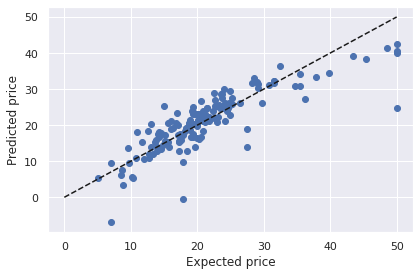

In [51]:
plt.scatter(expectation, pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

## Prediction with other Regression methods

- **Ridge, Lasso and ElasticNet**
- **Gradient Boosting Regressor**
- **XG Boost**
- **SGD Regressor**
According to sklearn's official documentation,  

"SGDRegressor is well suited for regression problems with a large number of training samples (> 10,000), for other problems we recommend Ridge, Lasso, or ElasticNet."

In [11]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [12]:
# TODO: Try tuning the hyper-parameters
models = {
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet" : ElasticNet(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "SGD" : SGDRegressor(max_iter=1000, tol=1e-3), 
    "XGB" : XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
}

pred_record = {}

In [13]:
# TODO: iterate through 'models', train your model, make prediction, get mse and rmse, 
#       print each model's mse and rmse inside the loop while iterating,
#       and then update 'pred_record' with each prediction.
#       pred_record should have {name : prediction array} structure

None

In [52]:
X_train, X_test, Y_train, Y_test = split_dataframe(boston_df)
model = Ridge()
model.fit(X_train, Y_train)

Ridge()

In [72]:
def displaymetrics( models, X_train: np.array, X_test: np.array, X: pd.DataFrame):
    for key in models:
      #creation of the model, training  the model and prediction 
        y_score = models[key].fit(X_train, Y_train).predict(X_test)
        print("--------------------------------------------------------------------------")
        print("Model:     ",models[key]);
        print("Mean Squared Error:   ", mean_squared_error(Y_test,y_score));
        print("Root Mean Squared Error     ",np.sqrt(mean_squared_error(Y_test,y_score)));
        print("--------------------------------------------------------------------------")
        pred_record.update({key: y_score})        
     
    return 

In [73]:
models.keys()

dict_keys(['Ridge', 'Lasso', 'ElasticNet', 'Gradient Boosting', 'SGD', 'XGB'])

In [74]:
displaymetrics( models, X_train, X_test, boston_df)

--------------------------------------------------------------------------
Model:      Ridge()
Mean Squared Error:    22.044053089861013
Root Mean Squared Error      4.695109486461526
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Model:      Lasso()
Mean Squared Error:    25.639502928043992
Root Mean Squared Error      5.063546477326341
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Model:      ElasticNet()
Mean Squared Error:    25.40519636428209
Root Mean Squared Error      5.040356769543411
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Model:      GradientBoostingRegressor()
Mean Squared Error:    7.98798172172363
Root Mean Squared Error      2.8263017747090684
----------------

In [75]:
pred_record.keys()

dict_keys(['Ridge', 'Lasso', 'ElasticNet', 'Gradient Boosting', 'SGD', 'XGB'])

In [76]:
for key in pred_record:
  print(pred_record[key])

[28.34715071 36.21437831 14.80303493 25.22804634 19.17458952 22.29031648
 17.33028278 13.95318273 22.14506024 20.74582213 24.14011309 18.40447565
 -7.01750315 21.1846762  19.19820978 26.02798498 19.86973569  5.51208138
 40.33260217 17.84866562 27.65388459 30.02887972 10.98804148 24.46625789
 18.37620309 15.25046005 22.61319214 14.80791284 21.62917267 19.57814764
 21.73254632 25.36726035 25.30044412 19.30763226 15.88564352 18.87116841
 30.92984029 20.76386724 23.49286646 24.67082407 14.0468997  31.67610639
 42.34382119 17.35629744 26.91818696 17.33727443 13.86600737 25.91730843
 19.76761959 30.38603367 21.22823089 33.9789751  15.71192385 26.17445031
 39.58477186 22.87290593 19.40274082 33.07593414 24.76614616 12.67254167
 23.02338367 31.20498451 31.79965924 16.82657749 21.53203533 15.72325795
 20.43639171 26.13467468 31.26561709 12.25025516 20.26960392 26.88812912
 11.2834432  17.76426079 23.29080816  5.24228688 21.24665934 41.08667425
 18.07558606  8.75619058 21.02820122 12.09211883 21

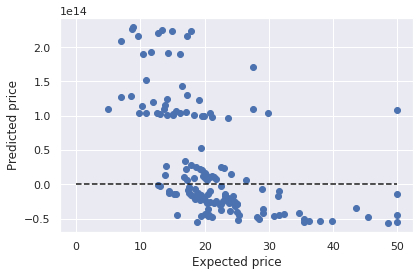

In [77]:
prediction = pred_record["SGD"]

plt.scatter(expectation, prediction)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

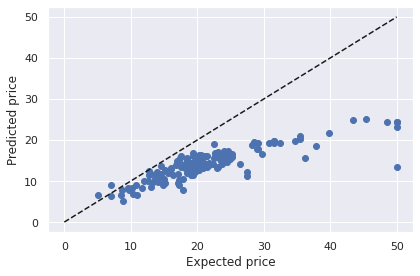

In [78]:
prediction = pred_record["XGB"]

plt.scatter(expectation, prediction)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

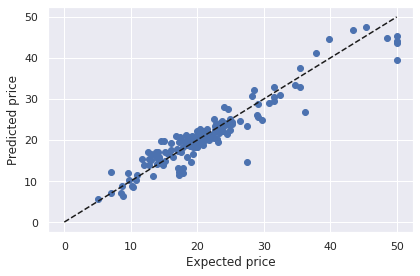

In [79]:
prediction = pred_record["Gradient Boosting"]

plt.scatter(expectation, prediction)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()

## A Little Taster Session for Neural Network

In [80]:
from tensorflow import keras
from tensorflow.keras.layers import add, Dense, Activation

def neural_net():
    model = keras.Sequential()
    model.add(Dense(512, input_dim=BOSTON_DATA.data.shape[1]))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(1))
    return model

In [81]:
model = neural_net()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [82]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [83]:
history = model.fit(X_train, Y_train, epochs=100)

loss, test_acc = model.evaluate(X_test, Y_test)
print('Test Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))

Epoch 1/100
12/12 [==============================] - 3s 3ms/step - loss: 372.0646 - accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 76.0213 - accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 84.9628 - accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 69.5768 - accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 89.5054 - accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 82.6894 - accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 78.6252 - accuracy: 0.0000e+00
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 77.1490 - accuracy: 0.0000e+00
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 63.1074 - accuracy: 0.0000e+00
Epoch 10/100
12/12 [==============================] - 0s 3ms/st

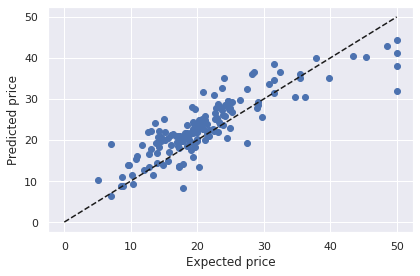

In [84]:
prediction = model.predict(X_test)

plt.scatter(expectation, prediction)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Expected price')
plt.ylabel('Predicted price')
plt.tight_layout()